In [0]:
import pandas as pd
import numpy as np
import pickle
import gzip


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import Dense, Conv3D, MaxPool3D, Dropout, Flatten, Conv3DTranspose, UpSampling3D, Reshape
from keras.layers import Input



Using TensorFlow backend.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Generator with List, for CAE training

In [0]:
def generator_l_2():
  
  #pixels=[]
  #q = 0
  im_num = 0
  while (im_num< 1173):
  #for batch_num in range(1173//7):
    #images =[]
    #labels =[]
    pixels=np.zeros(( 1 , 120, 160, 120))
    while (len(pixels)<2):
    
    #im_num = batch_num * 10 
    #while len(pixels) < 10:
    #for i in range(10):       
  #
    #while (q<10):
           # q +=1 
            try:
                path = '/content/drive/My Drive/PROCESSED/OAS3'
                path += str(im_num).zfill(4)+'_data'
                with open(path, 'rb') as f:
                      im= pickle.load(f)
                      #pixels.append(im['subject'])
                      #x = np.reshape(im['image'], (1, 120, 160, 120) )
                      #x = np.reshape(x, (1, 120, 160, 120, 1))
                      
                      
                      pixels=np.append(pixels,np.reshape(im['image'], (1, 120, 160, 120) ), axis=0) 
                      
                      im_num += 1
                      #pixels=np.reshape(im['image'], (1, 120, 160, 120) )
                      #pixels=np.reshape(pixels, (1, 120, 160, 120, 1) )
                      #images.append(pixels)
                      #labels.append(pixels)
            except:
                  im_num += 1
                  pass
    yield  (np.reshape(pixels[1:pixels.shape[0],:,:,:],(pixels.shape[0]-1,120,160,120,1)),\
            np.reshape(pixels[1:pixels.shape[0],:,:,:], (pixels.shape[0]-1,120,160,120,1)))

In [0]:
def gen_tr():
  
  #pixels=[]
  #q = 0
  im_num = 0
  batch_num = 0
  while True:
  #while (im_num< 1173):
  #for batch_num in range(1173//7):
    #images =[]
    #labels =[]
    pixels=np.zeros(( 1 , 120, 160, 120))
    while (len(pixels)<2):
    
    #im_num = batch_num * 10 
    #while len(pixels) < 10:
    #for i in range(10):       
  #
    #while (q<10):
           # q +=1 
            try:
                path = '/content/drive/My Drive/PROCESSED/OAS3'
                path += str(im_num).zfill(4)+'_data'
                with open(path, 'rb') as f:
                      im= pickle.load(f)
                      #pixels.append(im['subject'])
                      #x = np.reshape(im['image'], (1, 120, 160, 120) )
                      #x = np.reshape(x, (1, 120, 160, 120, 1))
                      
                      
                      pixels=np.append(pixels,np.reshape(im['image'], (1, 120, 160, 120) ), axis=0) 
                      
                      im_num += 1
                      #pixels=np.reshape(im['image'], (1, 120, 160, 120) )
                      #pixels=np.reshape(pixels, (1, 120, 160, 120, 1) )
                      #images.append(pixels)
                      #labels.append(pixels)
            except:
                  im_num += 1
    
                  pass
    batch_num += 1
    yield  (np.reshape(pixels[1:pixels.shape[0],:,:,:],(pixels.shape[0]-1,120,160,120,1)),\
            np.reshape(pixels[1:pixels.shape[0],:,:,:], (pixels.shape[0]-1,120,160,120,1)))

In [0]:
def gen_test():
  
  #pixels=[]
  #q = 0
  im_num = 0
  batch_num = 0
  #while (im_num< 1173):
  while True:
  #for batch_num in range(1173//7):
    #images =[]
    #labels =[]
    pixels=np.zeros(( 1 , 120, 160, 120))
    while (len(pixels)<2):
    
    #im_num = batch_num * 10 
    #while len(pixels) < 10:
    #for i in range(10):       
  #
    #while (q<10):
           # q +=1 
            try:
                path = '/content/drive/My Drive/PROCESSED/OAS3'
                im_num_inv = 1173 - im_num
                path += str(im_num_inv).zfill(4)+'_data'
                with open(path, 'rb') as f:
                      im= pickle.load(f)
                      #pixels.append(im['subject'])
                      #x = np.reshape(im['image'], (1, 120, 160, 120) )
                      #x = np.reshape(x, (1, 120, 160, 120, 1))
                      
                      
                      pixels=np.append(pixels,np.reshape(im['image'], (1, 120, 160, 120) ), axis=0) 
                      
                      im_num += 1
                      #pixels=np.reshape(im['image'], (1, 120, 160, 120) )
                      #pixels=np.reshape(pixels, (1, 120, 160, 120, 1) )
                      #images.append(pixels)
                      #labels.append(pixels)
            except:
                  im_num += 1
                  pass
    batch_num += 1
    yield  (np.reshape(pixels[1:pixels.shape[0],:,:,:],(pixels.shape[0]-1,120,160,120,1)),\
            np.reshape(pixels[1:pixels.shape[0],:,:,:], (pixels.shape[0]-1,120,160,120,1)))

In [0]:
train_gen = gen_tr()
test_gen = gen_test()

#### Subject IDs

In [0]:
im_name_list =[]

for x1 in images:
    im_name_list.append(x1)
im_name_list

['OAS30001',
 'OAS30002',
 'OAS30004',
 'OAS30005',
 'OAS30006',
 'OAS30007',
 'OAS30008',
 'OAS30019',
 'OAS30022',
 'OAS30024',
 'OAS30027']

#### Making training and test sets

In [0]:
pixels=np.zeros((1, 120, 160, 120))
for name in im_name_list:
    pixels= np.append(pixels ,np.reshape(images[name]['image'], (1, 120, 160, 120) ), axis=0)

input_ims= pixels[1:12,:,:,:] 
input_ims.shape

(11, 120, 160, 120)

do

In [0]:
x_train = input_ims[0:9,:,:,:]
x_train.shape

(9, 120, 160, 120)

In [0]:
x_test=input_ims[9:12,:,:,:]
x_test.shape

(2, 120, 160, 120)

In [0]:
x_test= np.reshape(x_test, (2, 120, 160, 120, 1) )

In [0]:
x_train = np.reshape(x_train, (9, 120, 160, 120, 1) )

#### Don't Making target values

In [0]:
len(input_ims)

11

In [0]:
#looking into first image
first_im=images['OAS30001']
first = first_im['image']
first.shape

(120, 160, 120)

In [0]:
first_modified= np.reshape(first, (120, 160, 120 , 1))

###To categorical

In [0]:
from keras.utils.np_utils import to_categorical
y_train= [images[key]['group'] for key in images.keys()]
y_train = pd.Series(y_train, dtype="category")
y_train = to_categorical(y_train.cat.codes)
y_train

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [0]:
y_test = y_train[:2]
y_test

array([[0., 1.],
       [0., 1.]], dtype=float32)

In [0]:
y_train = y_train[-9:]
y_train

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

#### Building Encoder

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import Dense, Conv3D, MaxPool3D, Dropout, Flatten, Conv3DTranspose, UpSampling3D, Reshape
from keras.layers import Input


input_img = Input(shape= (120, 160, 120 , 1))
x = Conv3D(10, (3,3,3), activation='relu', padding='same')(input_img)
x = MaxPool3D((2,2,2))(x)
x= Dropout(0.8)(x)

x = Conv3D(10, (3,3,3), activation='relu', padding='same')(x)
x = MaxPool3D((2,2,2))(x)
x= Dropout(0.8)(x)

x = Conv3D(10, (3,3,3), activation='relu', padding='same')(x)
x = MaxPool3D((2,2,2))(x)
encoded= Dropout(0.8)(x)

encoded_shape = K.int_shape(x)

#x = Flatten()(x)

#x = Dense(32, activation='selu')(x)
#x= Dense(16, activation='selu')(x)
#encoded = Dense(2, activation='selu')(x)


encoder=Model(input_img, encoded, name='encoder')
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 120, 160, 120, 1)  0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 120, 160, 120, 10) 280       
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 60, 80, 60, 10)    0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 80, 60, 10)    0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 60, 80, 60, 10)    2710      
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 30, 40, 30, 10)    0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 40, 30, 10)    0   

In [8]:
encoded_shape

(None, 15, 20, 15, 10)

#### Building decoder

In [9]:
encoded_input= Input(shape=(encoded_shape[1], encoded_shape[2], encoded_shape[3], encoded_shape[4]))
#x = Dense(16, activation='selu')(encoded_input)
#x= Dense(32, activation='selu')(x)
#x= Dense(np.prod(encoded_shape[1:]))(x)
#x= Reshape((encoded_shape[1], encoded_shape[2], encoded_shape[3], encoded_shape[4]))(x)

x = Conv3DTranspose(10, (3,3,3), activation='relu', padding='same')(encoded_input)
x = UpSampling3D((2,2,2))(x)
x= Dropout(0.8)(x)

x = Conv3DTranspose(10, (3,3,3), activation='relu', padding='same')(x)
x = UpSampling3D((2,2,2))(x)
x= Dropout(0.8)(x)

x = Conv3DTranspose(10, (3,3,3), activation='relu', padding='same')(x)
x = UpSampling3D((2,2,2))(x)
x= Dropout(0.8)(x)

x = Conv3DTranspose(1, (3,3,3), activation='sigmoid', padding='same')(x)

decoder = Model(encoded_input, x, name='decoder')
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 15, 20, 15, 10)    0         
_________________________________________________________________
conv3d_transpose_1 (Conv3DTr (None, 15, 20, 15, 10)    2710      
_________________________________________________________________
up_sampling3d_1 (UpSampling3 (None, 30, 40, 30, 10)    0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 30, 40, 30, 10)    0         
_________________________________________________________________
conv3d_transpose_2 (Conv3DTr (None, 30, 40, 30, 10)    2710      
_________________________________________________________________
up_sampling3d_2 (UpSampling3 (None, 60, 80, 60, 10)    0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 80, 60, 10)    0   

#### Building Autoencoder

In [10]:
autoencoder= Model(input_img, decoder(encoder(input_img)), name='autoencoder')
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 120, 160, 120, 1)  0         
_________________________________________________________________
encoder (Model)              (None, 15, 20, 15, 10)    5700      
_________________________________________________________________
decoder (Model)              (None, 120, 160, 120, 1)  8401      
Total params: 14,101
Trainable params: 14,101
Non-trainable params: 0
_________________________________________________________________


In [0]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
hist_gen= autoencoder.fit_generator(generator=train_gen, steps_per_epoch = 490, epochs=1, verbose=1 )


Epoch 1/1
 13/490 [..............................] - ETA: 1:23 - loss: 0.0156

KeyboardInterrupt: ignored

In [21]:
hist_gen_val= autoencoder.fit_generator(generator=train_gen, steps_per_epoch = 420, epochs=1, verbose=1 , validation_data=test_gen, validation_steps=70)

Epoch 1/1
420/420 [==============================] - 100s 239ms/step - loss: 0.0118 - val_loss: 0.0436


In [12]:
980/ 70

14.0

In [0]:
# 2 ta 70 ta = test, 12 ta 70 ta train,# 140 ta test, 840 ta train, # 70 ta batch test, 420 ta batch train

In [0]:
model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10)

In [0]:


hist= autoencoder.fit(x_train, x_train, batch_size=3, epochs=30, verbose=1, validation_data=(x_test, x_test))


Train on 9 samples, validate on 2 samples
Epoch 1/30
9/9 [==============================] - 2s 170ms/step - loss: 0.2401 - val_loss: 0.1556
Epoch 2/30
9/9 [==============================] - 1s 108ms/step - loss: 0.1717 - val_loss: 0.1547
Epoch 3/30
9/9 [==============================] - 1s 108ms/step - loss: 0.1519 - val_loss: 0.1536
Epoch 4/30
9/9 [==============================] - 1s 108ms/step - loss: 0.1476 - val_loss: 0.1522
Epoch 5/30
9/9 [==============================] - 1s 107ms/step - loss: 0.1459 - val_loss: 0.1504
Epoch 6/30
9/9 [==============================] - 1s 108ms/step - loss: 0.1441 - val_loss: 0.1483
Epoch 7/30
9/9 [==============================] - 1s 108ms/step - loss: 0.1417 - val_loss: 0.1457
Epoch 8/30
9/9 [==============================] - 1s 108ms/step - loss: 0.1385 - val_loss: 0.1422
Epoch 9/30
9/9 [==============================] - 1s 108ms/step - loss: 0.1341 - val_loss: 0.1377
Epoch 10/30
9/9 [==============================] - 1s 108ms/step - loss: 0.1

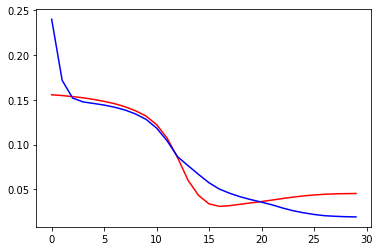

In [0]:
plt.plot(hist.history['val_loss'], 'r', hist.history['loss'], 'b')

###Building Classifier

In [0]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 120, 160, 120, 1)  0         
_________________________________________________________________
encoder (Model)              (None, 15, 20, 15, 10)    5700      
_________________________________________________________________
decoder (Model)              (None, 120, 160, 120, 1)  8401      
Total params: 14,101
Trainable params: 14,101
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras.layers import Softmax

In [0]:
encoder_c = autoencoder.layers[1]

In [0]:
encoder_c.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 120, 160, 120, 1)  0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 120, 160, 120, 10) 280       
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 60, 80, 60, 10)    0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 80, 60, 10)    0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 60, 80, 60, 10)    2710      
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 30, 40, 30, 10)    0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 40, 30, 10)    0   

###New Encoder, classifier to be

In [0]:
input_img = Input(shape= (120, 160, 120 , 1))
x = Conv3D(10, (3,3,3), activation='relu', padding='same')(input_img)
x = MaxPool3D((2,2,2))(x)
x= Dropout(0.8)(x)

x = Conv3D(10, (3,3,3), activation='relu', padding='same')(x)
x = MaxPool3D((2,2,2))(x)
x= Dropout(0.8)(x)

x = Conv3D(10, (3,3,3), activation='relu', padding='same')(x)
x = MaxPool3D((2,2,2))(x)
x= Dropout(0.8)(x)

encoded_shape = K.int_shape(x)

x = Flatten()(x)

x = Dense(32, activation='selu')(x)
x= Dense(16, activation='selu')(x)
new_encoded = Dense(2, activation='softmax')(x)


classifier=Model(input_img, new_encoded, name='classifier')
classifier.summary()

Model: "classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 120, 160, 120, 1)  0         
_________________________________________________________________
conv3d_10 (Conv3D)           (None, 120, 160, 120, 10) 280       
_________________________________________________________________
max_pooling3d_10 (MaxPooling (None, 60, 80, 60, 10)    0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 60, 80, 60, 10)    0         
_________________________________________________________________
conv3d_11 (Conv3D)           (None, 60, 80, 60, 10)    2710      
_________________________________________________________________
max_pooling3d_11 (MaxPooling (None, 30, 40, 30, 10)    0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 30, 40, 30, 10)    0

### Fitting data

In [0]:

classifier.layers

In [0]:
for layer_num in range(len(encoder_c.get_weights())):
  classifier.layers[layer_num].set_weights(encoder_c.layers[layer_num].get_weights())

In [0]:
#didn't freeze
classifier.compile(optimizer='adam', loss='binary_crossentropy')

In [0]:
classifier.summary()

Model: "classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 120, 160, 120, 1)  0         
_________________________________________________________________
conv3d_10 (Conv3D)           (None, 120, 160, 120, 10) 280       
_________________________________________________________________
max_pooling3d_10 (MaxPooling (None, 60, 80, 60, 10)    0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 60, 80, 60, 10)    0         
_________________________________________________________________
conv3d_11 (Conv3D)           (None, 60, 80, 60, 10)    2710      
_________________________________________________________________
max_pooling3d_11 (MaxPooling (None, 30, 40, 30, 10)    0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 30, 40, 30, 10)    0

In [0]:
classifier_history= classifier.fit(x_train, y_train, batch_size=3, epochs=3, verbose=1, validation_data=(x_test, y_test))

Train on 9 samples, validate on 2 samples
Epoch 1/3
9/9 [==============================] - 0s 54ms/step - loss: 0.0024 - val_loss: 0.8251
Epoch 2/3
9/9 [==============================] - 0s 53ms/step - loss: 0.0042 - val_loss: 0.8269
Epoch 3/3
9/9 [==============================] - 0s 53ms/step - loss: 0.0243 - val_loss: 0.8248


In [0]:
classifier.predict(x_test)

array([[0.5629819 , 0.43701807],
       [0.56037897, 0.43962103]], dtype=float32)

In [0]:
classifier.evaluate(x_test, y_test, verbose=1)

2/2 [==============================] - 0s 18ms/step


0.8248112201690674